# Lab 3 - Visualization

The goal of today's lab is to become great at data visualization and
graphs.  This is a really fun topic as it allows us to make images that
represent our underlying data and problems.

When doing machine learning we are going to make a lot of graphs
that describe each of the systems that we build. Visualizations are
a great way understand and explain what is happening in our systems.

Last week we finished with a neat visualization of cities. This week
we will see how that works and more.

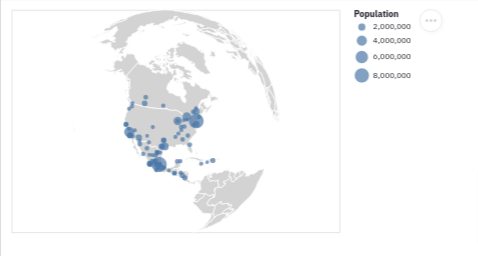

# Review

Before we dive in let's do a little review of some of the methods we
saw in last class on data frames. The main toolkit we used last class was called `Pandas`.

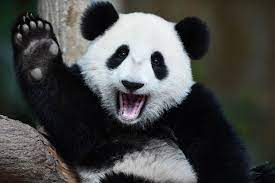

In [1]:
import pandas as pd

Last time we focused on a dataset of cities and locations.

In [2]:
df = pd.read_csv("https://srush.github.io/BT-AI/notebooks/Cities.csv")
df

,Rank,City,Country,Population
0,0,Mexico City,Mexico,8918653
1,1,New York City,United States,8550405
2,2,Los Angeles,United States,3971883
3,3,Toronto,Canada,2826498
4,4,Chicago,United States,2720546
...,...,...,...,...
90,90,Surrey,Canada,526004
91,91,Ciudad López Mateos,Mexico,523296
92,92,Tultitlán,Mexico,520557
93,93,Fresno,United States,520052


In [3]:
df.groupby([pd.cut(df.Population, 5)], as_index=False).size()

,Population,size
0,"(493351.115, 2185145.0]",89
1,"(2185145.0, 3868522.0]",3
2,"(3868522.0, 5551899.0]",1
3,"(5551899.0, 7235276.0]",0
4,"(7235276.0, 8918653.0]",2


In this class we will start to work on a new data set about the
temperatures and climate change of different cities over time.

Click here to see the full dataset as a spreadsheet [Temperatures](https://docs.google.com/spreadsheets/d/1Jwcr6IBJbOT1G4Vq7VqaZ7S1V9gRmUb5ALkJPaG5fxI/edit#gid=2108802139)

This data comes from the [Berkeley Earth Project](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).

Recall that we first need to load in our data. We saw the `read_csv`
function from last time.

In [4]:
def load():
    return pd.read_csv("https://srush.github.io/BT-AI/notebooks/Temperatures.csv",
                       index_col=0,
                       parse_dates=["Date"])
df = load().copy()
df

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude
58171,1843-04-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47
58174,1843-07-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47
58177,1843-10-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47
58180,1844-01-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47
58183,1844-04-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47
...,...,...,...,...,...,...,...
592169,2012-07-01,18.455,0.347,Villeurbanne,France,45.81,5.77
592172,2012-10-01,10.154,0.173,Villeurbanne,France,45.81,5.77
592175,2013-01-01,0.516,0.592,Villeurbanne,France,45.81,5.77
592178,2013-04-01,8.755,0.410,Villeurbanne,France,45.81,5.77


(We need to add a bit of extra options in
order to load this data in. In particular we want to have a date
column.  One way you can look this up is through the function
[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
Although remember! Often the best thing to do is to find the
[answer](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
on stack overflow.)

Let's now review the different tools that we have available for us.

👩‍🎓 *Student Question: Do you remember how to see the columns of a data table?*

In [5]:
#📝📝📝📝
df["Temperature"]

58171        NaN
58174        NaN
58177        NaN
58180        NaN
58183        NaN
           ...  
592169    18.455
592172    10.154
592175     0.516
592178     8.755
592181    20.531
Name: Temperature, Length: 273594, dtype: float64

We can also filter the table to find only the rows with certain filtered values.

In [6]:
filter = df["City"] == "New York"
nyc_df = df.loc[filter]
nyc_df

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude
5203975,1744-01-01,NaN,NaN,New York,United States,40.99,-74.56
5203978,1744-04-01,9.788,2.151,New York,United States,40.99,-74.56
5203981,1744-07-01,22.207,1.305,New York,United States,40.99,-74.56
5203984,1744-10-01,8.968,1.558,New York,United States,40.99,-74.56
5203987,1745-01-01,-2.363,1.771,New York,United States,40.99,-74.56
...,...,...,...,...,...,...,...
5207197,2012-07-01,24.479,0.403,New York,United States,40.99,-74.56
5207200,2012-10-01,12.436,0.344,New York,United States,40.99,-74.56
5207203,2013-01-01,-0.968,0.290,New York,United States,40.99,-74.56
5207206,2013-04-01,9.723,0.355,New York,United States,40.99,-74.56


Note that some of the columns in the dataset are `NaN`. This is a special symbol in Pandas
that is used to indicate that there are is not data for that cell. In this case it corresponds
to some months with no measurement.

We have seen how we can use multiple filters and combine them with
elements like or `|` and `&`.

In [7]:
filter = (df["City"] == "New York") | (df["City"] == "Philadelphia")
nyc_phila_df = df.loc[filter]
nyc_phila_df

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude
5203975,1744-01-01,NaN,NaN,New York,United States,40.99,-74.56
5203978,1744-04-01,9.788,2.151,New York,United States,40.99,-74.56
5203981,1744-07-01,22.207,1.305,New York,United States,40.99,-74.56
5203984,1744-10-01,8.968,1.558,New York,United States,40.99,-74.56
5203987,1745-01-01,-2.363,1.771,New York,United States,40.99,-74.56
...,...,...,...,...,...,...,...
5849433,2012-07-01,26.118,0.315,Philadelphia,United States,39.38,-74.91
5849436,2012-10-01,14.584,0.321,Philadelphia,United States,39.38,-74.91
5849439,2013-01-01,2.252,0.196,Philadelphia,United States,39.38,-74.91
5849442,2013-04-01,11.459,0.319,Philadelphia,United States,39.38,-74.91


Once there is a dataframe that is filtered in a specific manner
we can use it to compute properties on the remaining data.

In [8]:
average_temp = nyc_df["Temperature"].mean()
average_temp

9.514878846153847

Finally we can add new columns by setting them in the original dataframe.

In [9]:
def in_nyc(city):
    "Returns True if the city is New York"
    if city == "New York":
        return True
    return False
df["InNYC"] = df["City"].map(in_nyc)
df

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude,InNYC
58171,1843-04-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False
58174,1843-07-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False
58177,1843-10-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False
58180,1844-01-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False
58183,1844-04-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False
...,...,...,...,...,...,...,...,...
592169,2012-07-01,18.455,0.347,Villeurbanne,France,45.81,5.77,False
592172,2012-10-01,10.154,0.173,Villeurbanne,France,45.81,5.77,False
592175,2013-01-01,0.516,0.592,Villeurbanne,France,45.81,5.77,False
592178,2013-04-01,8.755,0.410,Villeurbanne,France,45.81,5.77,False


## Review Exercise

Exercise 1: In this data set the column "Temperature" is the average temperature for the month.
Can you compute the highest monthly temperature for Philadelphia in this dataset?
What month and year did it occur?

In [10]:
filter = (df["City"] == "Philadelphia")
temp = df.loc[filter]["Temperature"].max()
temp_idx = df.loc[filter]["Temperature"].idxmax()
date = df.loc[temp_idx]["Date"]
print(f"Highest temp: {temp} in month {date.month} year {date.year}")

Highest temp: 30.447 in month 7 year 1761


Exercise 2: Last week we saw how to add an extra column into a dataset. 
The temperature column in this dataset is in Celsius. Can you add a new column for
Farenheit temperature? (The formula is $F = (C× 9/5) + 32$)

In [11]:
df["Farenheit"] = df["Temperature"] * 9 / 5 + 32
df

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude,InNYC,Farenheit
58171,1843-04-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False,NaN
58174,1843-07-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False,NaN
58177,1843-10-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False,NaN
58180,1844-01-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False,NaN
58183,1844-04-01,NaN,NaN,Acapulco,Mexico,16.87,-100.47,False,NaN
...,...,...,...,...,...,...,...,...,...
592169,2012-07-01,18.455,0.347,Villeurbanne,France,45.81,5.77,False,65.2190
592172,2012-10-01,10.154,0.173,Villeurbanne,France,45.81,5.77,False,50.2772
592175,2013-01-01,0.516,0.592,Villeurbanne,France,45.81,5.77,False,32.9288
592178,2013-04-01,8.755,0.410,Villeurbanne,France,45.81,5.77,False,47.7590


# Unit A

The goal of today's lab will be to learn how to visualize our data
using charts and graphs. Data and spreadsheets by themselves are
pretty boring, but graphs and charts allows us to tell the story
about what is happening behind the scenes.

For example let's consider these graph from the New York Times about
the impacts of climate change in the 20th century.

Graph of [Where are America's Winters Warming the Most?](https://www.nytimes.com/interactive/2018/03/16/climate/us-winter-warming.html)

![Climate](https://static01.nyt.com/images/2019/01/15/learning/WinterTemperatures2LN/WinterTemperatures2LN-superJumbo.png?quality=90&auto=webp)

Graph of [Artic Sea Ice](https://www.nytimes.com/interactive/2017/09/22/climate/arctic-sea-ice-shrinking-trend-watch.html)

![](https://static01.nyt.com/images/2019/02/13/learning/SeaIceLN/SeaIceLN-jumbo.png?quality=90&auto=webp)

👩‍🎓 *Student Question: How do these graphs differ?  What do they "encode" on their axes? What do they encode in their colors?*

## Example Data

Before we return to our temperature data let us consider graphing
some data.

For this unit we will assume that we are coaching a track
team. There are four members of the team.

In [12]:
athletes = ["Soledad", "Jamie", "Meira", "Jung-Sook"]

These names are random. Just for fun lets give them each a random photo too.

In [13]:
images = {"Soledad": "https://srush.github.io/BT-AI/image1.jpeg",
          "Jamie": "https://srush.github.io/BT-AI/image2.jpeg",
          "Meira": "https://srush.github.io/BT-AI/image3.jpeg",
          "Jung-Sook": "https://srush.github.io/BT-AI/image4.jpeg"}

![A](https://srush.github.io/BT-AI/image1.jpeg)

![B](https://srush.github.io/BT-AI/image2.jpeg)

![C](https://srush.github.io/BT-AI/image3.jpeg)

![D](https://srush.github.io/BT-AI/image4.jpeg)

These images were generated by AI! If you want to generate a new person you can do it here.

https://thispersondoesnotexist.com/

There have been five track meets so far this season and each athelete has run in each of them.

In [14]:
meets = [1, 2, 3, 4, 5]

Here are their running times. Note that we are representing them as a
list of dictionaries with the athlete meet and time.

In [15]:
times = [{'athlete': 'Soledad', 'meet': 1, 'time': 10.274234127603819}, {'athlete': 'Soledad', 'meet': 2, 'time': 10.804654030945134}, {'athlete': 'Soledad', 'meet': 3, 'time': 10.720626632654193}, {'athlete': 'Soledad', 'meet': 4, 'time': 9.804132329178772}, {'athlete': 'Soledad', 'meet': 5, 'time': 10.404912209134388}, {'athlete': 'Jamie', 'meet': 1, 'time': 11.655619806058349}, {'athlete': 'Jamie', 'meet': 2, 'time': 11.572477407100791}, {'athlete': 'Jamie', 'meet': 3, 'time': 10.927372423232223}, {'athlete': 'Jamie', 'meet': 4, 'time': 10.78549207395879}, {'athlete': 'Jamie', 'meet': 5, 'time': 11.345569807912721}, {'athlete': 'Meira', 'meet': 1, 'time': 9.108715402467988}, {'athlete': 'Meira', 'meet': 2, 'time': 9.689643262622113}, {'athlete': 'Meira', 'meet': 3, 'time': 9.139530785504235}, {'athlete': 'Meira', 'meet': 4, 'time': 9.129667780531356}, {'athlete': 'Meira', 'meet': 5, 'time': 9.361089344017424}, {'athlete': 'Jung-Sook', 'meet': 1, 'time': 8.764472058652602}, {'athlete': 'Jung-Sook', 'meet': 2, 'time': 8.1119272852491}, {'athlete': 'Jung-Sook', 'meet': 3, 'time': 8.787020155204402}, {'athlete': 'Jung-Sook', 'meet': 4, 'time': 8.147531540987394}, {'athlete': 'Jung-Sook', 'meet': 5, 'time': 8.18982105467709}]

This is an alternative way of creating a pandas dataframe. Sometimes it is easier than reading from a CSV file.

In [16]:
df = pd.DataFrame(times)
df

,athlete,meet,time
0,Soledad,1,10.274234
1,Soledad,2,10.804654
2,Soledad,3,10.720627
3,Soledad,4,9.804132
4,Soledad,5,10.404912
5,Jamie,1,11.655620
6,Jamie,2,11.572477
7,Jamie,3,10.927372
8,Jamie,4,10.785492
9,Jamie,5,11.345570


We can add the pictures in as well.

In [17]:
def add_image(name):
    return images[name]
df["image"] = df["athlete"].map(add_image)

Our goal is to create graphs to help our team improve at the next meet.

Before we begin though, let us consider the *types* of the three different columns.
This will help us decide what charts to use.

1. Athlete - This is simply the person name. All people are equal and in no order. We say this is therefore a *Nominal* column.
2. Meet - This only takes whole number values. We know that Meet 3 occurred after Meet 1, but there is no meet 2.5. This is therefore a *Ordinal* column.
3. Times - This is a decimal column. It contains very precise numerical values. This is therefore a *Quantitative* column. 

Data Column Cheat Sheet:
* Nominal - N
* Ordinal - O
* Quantitative - Q
* Temporal - T

## Visualization

To build visualizations we are again going to rely heavily on
datatables and use a new library called `altair`. This library has
very nice [documentation](https://altair-viz.github.io/)

In [18]:
import altair as alt

We can make a graph by converting our table into a `Chart`. We do this
in three steps:

* Chart - Process your a dataframe to only what you want to include
* Mark - Determine which type of chart we want
* Encode - Say which Pandas columns correspond to which dimensions

When you think about making a graph think very carefully about what question
you want to answer. Try to make one graph for each question. 

### Example 1: Who ran the fastest?

For this example we will simply try to determine who ran the fastest.

* Chart - Determine the fastest run
* Mark - Show as a bar graph
* Encode - Let the x be athlete (nominal) and y be times (quantitative)

In [19]:
faster_df = df.groupby(["athlete"], as_index=False).min()
faster_df

,athlete,meet,time,image
0,Jamie,1,10.785492,https://srush.github.io/BT-AI/image2.jpeg
1,Jung-Sook,1,8.111927,https://srush.github.io/BT-AI/image4.jpeg
2,Meira,1,9.108715,https://srush.github.io/BT-AI/image3.jpeg
3,Soledad,1,9.804132,https://srush.github.io/BT-AI/image1.jpeg


Once we have our data we make a graph in three steps. 

In [20]:
chart = (alt.Chart(faster_df)
           .mark_bar()
           .encode(x = "athlete:N",
                   y = "time:Q"))
chart

alt.Chart(...)

The important parts are the `mark_X` which gives the type, encode which tells the library which
columns to use, and ":N" which says it is a Nominal (or other type).

### Example 2: How did Jung-Sook's times change in the season?

* Chart - Filter to Jung-Sook's runs
* Mark - Show as a line graph
* Encode - Let the x be meet (ording) and y be times (quantitative)

In [21]:
js_df = df[df["athlete"] == "Jung-Sook"]
chart = (alt.Chart(js_df)
           .mark_line()
           .encode(x = "meet:O",
                   y = "time:Q"))
chart

alt.Chart(...)

👩‍🎓 *Student Question: Can you compute this for another runner? Can
you make it a bar graph instead?*

In [22]:
m_df = df[df["athlete"] == "Meira"]
chart = (alt.Chart(js_df)
           .mark_bar()
           .encode(x = "meet:O",
                   y = "time:Q"))
chart

alt.Chart(...)

### Example 3: How did all the runners compare over the season?

* Chart - All the data
* Mark - Show as a line graph
* Encode - Let the x be meet (ordinal) and y be times (quantitative) and the color be the athlete (nominal)

In [23]:
chart = (alt.Chart(df)
           .mark_line())
chart = chart.encode(color = "athlete",
                   x = "meet:O",
                   y = "time:Q")
chart

alt.Chart(...)

Alternatively we can split this into 4 different individual graphs using facet.

In [24]:
chart = alt.Chart(df).mark_point()

chart = chart.encode(x='meet:N', y='time:Q', shape='athlete:N', tooltip=['athlete:N', 'meet:N'])
chart.configure_mark(size=50,color='red')

chart

alt.Chart(...)

In [25]:
chart = (alt.Chart(df)
           .mark_line()
           .encode(facet = "athlete",
                   x = "meet:O",
                   y = "time:Q"))
chart

alt.Chart(...)

Finally one nice aspect of the library is that we can include
 multiple charts on the same graph.

In [26]:
meet_df = df.loc[df["meet"] == 1]
chart1 = (alt.Chart(meet_df)
           .mark_bar()
           .encode(x = "athlete:N",
                   y = "time:Q"))
chart1

alt.Chart(...)

In [27]:
chart2 = (alt.Chart(meet_df)
           .mark_image()
           .encode(x = "athlete:N",
                   y = "time:Q",
                   url = "image"
           ))
chart2

alt.Chart(...)

In [28]:
chart = chart1 + chart2
chart

alt.LayerChart(...)

# Group Exercise A

## Question 0

Who are other members of your group today?

In [29]:
#📝📝📝📝 FILLME
pass

What was the last great book that they read? 

In [30]:
#📝📝📝📝 FILLME
pass

What clubs are they in at school? 

In [31]:
#📝📝📝📝 FILLME
pass

## Question 1

We would like to know the average time between all of the runners at each
meet this will give us a sense of whether the team is improving. Can you
make a group-by command to find the average time at each meet?

In [32]:
grouped_mean = df.groupby(["meet"],  as_index=False).mean()
grouped_mean

,meet,time
0,1,9.950760
1,2,10.044675
2,3,9.893637
3,4,9.466706
4,5,9.825348


Can you plot your results as a line graph?

In [33]:
chart_mean = (alt.Chart(grouped_mean)
           .mark_line()
           .encode(x = "meet:O",
                   y = "time:Q"))
chart_mean

alt.Chart(...)

## Question 2

The `point` mark will draw a single point for each data input it is given.
 Can you draw a point graph that will plot each runners time for each meet over the
season?

In [34]:
chart = (alt.Chart(df)
           .mark_point()
           .encode(
               x = "meet:O",
               y = "time:Q"))
chart

alt.Chart(...)

The `shape` encoding will use a different shape for each data point. Can you add a shape
encoding based on the athlete name?

In [35]:
chart = (alt.Chart(df)
           .mark_point()
           .encode(
               shape = "athlete:N",
               x = "meet:O",
               y = "time:Q"))
chart

alt.Chart(...)

The `tooltip` encoding will make it so you can mouseover the
datapoint of interest. If you give it a list of columns it will
include all of them. Add a tooltip for the athlete and the meet.

In [36]:
chart_indiv = (alt.Chart(df)
           .mark_point()
           .encode(
               shape = "athlete:N",
               x = "meet:O",
               y = "time:Q",
               tooltip=['athlete', 'meet']
           ))
chart_indiv

alt.Chart(...)

Finally this graph can be combined with the average time of each meet above. Combine them into a single graph.

In [37]:
chart=chart_mean+chart_indiv
chart

alt.LayerChart(...)

## Question 3

Altair graphs can be customized with a lot of visualization options in additions to the ones we have seen so far.

For this exercise you will want to consult [Altair Configuation docs](https://altair-viz.github.io/user_guide/configuration.html).

* Add a title.
* Make the graph bigger
* Add better axis names.
* Change the color of the points
* Make the points larger.
* Give the legend rounded corners.
* Add any other customizations you would like!

In [38]:
# Note that there are several different ways to 
# make these changes! Provided below is at least
# one way for each.
chart_indiv = (alt.Chart(df)
               # set size and color of points
           .mark_point(size=300, color='purple')
           .encode(
               shape = "athlete:N",
               # set axis names
               x = alt.X("meet:O", title="Meet number"),
               y = alt.Y("time:Q", title="Running Time (s)"),
               tooltip=['athlete', 'meet']
           ))

chart_indiv = chart_indiv.properties(
    # set title
    title="Running Times",
    # make graph bigger
    width=400,
    height=400,
    # add axes  
).configure_legend( # to give the legend rounded corners:
    strokeColor='gray', # gray outline around legend
    cornerRadius=10, # rounded corner of radius 10
    padding=10 # pad some space b/w outline and contents
)

chart_indiv

alt.Chart(...)

# Unit B

## Advanced Pandas

Now we are going to try working with a realistic large dataset for our visualization.

In [39]:
df = load().copy()

Our filtering so far has mainly tried to filter rows by string values,
but we can filter by many different properties. These properties
depend on the type of the column.

If you remember back to lesson 1, we saw how we could use a dates
in python.

In [40]:
import datetime
date1 = datetime.datetime.now()
date1

datetime.datetime(2021, 7, 15, 14, 36, 53, 358625)

In [41]:
print(date1.day, date1.month, date1.year)

15 7 2021


Let's look now at the types of our columns.

In [42]:
df.dtypes

Date                      datetime64[ns]
Temperature                      float64
TemperatureUncertainty           float64
City                              object
Country                           object
Latitude                         float64
Longitude                        float64
dtype: object

We can see that `data` is a date. Therefore
we can access similar properties as we have seen in the table.

In [43]:
df["Date"].dt.month

58171      4
58174      7
58177     10
58180      1
58183      4
          ..
592169     7
592172    10
592175     1
592178     4
592181     7
Name: Date, Length: 273594, dtype: int64

Let's convert these into columns

In [48]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

Now these are columns in the table.

In [49]:
df.columns

Index(['Date', 'Temperature', 'TemperatureUncertainty', 'City', 'Country',
       'Latitude', 'Longitude', 'Month', 'Year'],
      dtype='object')

We can use some complex filters for checking for specific months and years in our dataset.

In [53]:
filter = (df["Month"] == 7) & (df["Year"] == 1950)
summer = df.loc[filter]
summer

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
59458,1950-07-01,27.149,0.352,Acapulco,Mexico,16.87,-100.47,7,1950
106319,1950-07-01,20.409,0.360,Aguascalientes,Mexico,21.70,-102.98,7,1950
169641,1950-07-01,22.148,0.198,Albuquerque,United States,34.56,-107.03,7,1950
355810,1950-07-01,30.039,0.438,Apodaca,Mexico,26.52,-100.30,7,1950
489823,1950-07-01,28.817,0.206,Austin,United States,29.74,-97.85,7,1950
...,...,...,...,...,...,...,...,...,...
578469,1950-07-01,19.623,0.328,Strasbourg,France,49.03,7.35,7,1950
581708,1950-07-01,24.720,0.226,Toulon,France,42.59,6.55,7,1950
584947,1950-07-01,21.599,0.383,Toulouse,France,44.20,2.24,7,1950
588186,1950-07-01,20.587,0.138,Tours,France,47.42,1.18,7,1950


We can also filter by ranges of dates to pull out a specific period.

In [54]:
filter = (df["Year"] >= 1950) & (df["Year"] <= 1960)
fifties = df.loc[filter]
fifties

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
59452,1950-01-01,25.870,0.506,Acapulco,Mexico,16.87,-100.47,1,1950
59455,1950-04-01,24.797,0.812,Acapulco,Mexico,16.87,-100.47,4,1950
59458,1950-07-01,27.149,0.352,Acapulco,Mexico,16.87,-100.47,7,1950
59461,1950-10-01,26.514,0.430,Acapulco,Mexico,16.87,-100.47,10,1950
59464,1951-01-01,24.746,0.505,Acapulco,Mexico,16.87,-100.47,1,1951
...,...,...,...,...,...,...,...,...,...
591536,1959-10-01,9.152,0.262,Villeurbanne,France,45.81,5.77,10,1959
591539,1960-01-01,-0.268,0.250,Villeurbanne,France,45.81,5.77,1,1960
591542,1960-04-01,7.973,0.417,Villeurbanne,France,45.81,5.77,4,1960
591545,1960-07-01,16.047,0.224,Villeurbanne,France,45.81,5.77,7,1960


Putting this all together we can group New York in the 50's into one dataframe.

In [55]:
filter = (df["City"] == "New York") & (df["Year"] >= 1950) & (df["Year"] <= 1960)
period = df.loc[filter]

## Visualizing Complex Data

As with the runners above this allows us to explore our data along
many different charts and questions. Here are some examples

### Example 1: How did the temperature of New York change during the 50's?

* Chart - New York city Over the last 10 years
* Mark - Line graph showing pattern.
* Encode - Date (new type- temporal) and temperature (quantitative)

In [56]:
chart = (alt.Chart(period)
           .mark_line()
           .encode(x = "Date:T",
                   y = "Temperature:Q"))
chart

alt.Chart(...)

### Example 2: How do the monthly temperatures of New York fluctuate per year?

This graph instead uses the year as the x-axis and color to represent the time of the year. This makes it easier to compare months to each other.

* Chart - NYC with data from over the last 10 years
* Mark - Line graph
* Encode - Year as ordinal axis, temperature as y-axis, month as color.

In [57]:
chart = (alt.Chart(period)
            .mark_line()
            .encode(x = "Year:O",
                    y = "Temperature:Q",
                    color = "Month:N"))
chart

alt.Chart(...)

### Example 3: How does the temperature in NYC vary over a 200 year period?

In [58]:
filter = (df["City"] == "New York") & (df["Year"] >= 1800) & (df["Year"] <= 2000)
period = df.loc[filter]
period

,Date,Temperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
5204647,1800-01-01,-3.592,2.199,New York,United States,40.99,-74.56,1,1800
5204650,1800-04-01,10.463,2.164,New York,United States,40.99,-74.56,4,1800
5204653,1800-07-01,23.297,2.179,New York,United States,40.99,-74.56,7,1800
5204656,1800-10-01,10.432,3.451,New York,United States,40.99,-74.56,10,1800
5204659,1801-01-01,-3.215,2.055,New York,United States,40.99,-74.56,1,1801
...,...,...,...,...,...,...,...,...,...
5207044,1999-10-01,10.438,0.194,New York,United States,40.99,-74.56,10,1999
5207047,2000-01-01,-3.168,0.238,New York,United States,40.99,-74.56,1,2000
5207050,2000-04-01,8.897,0.190,New York,United States,40.99,-74.56,4,2000
5207053,2000-07-01,20.727,0.407,New York,United States,40.99,-74.56,7,2000


In [79]:
chart = (alt.Chart(period)
            .mark_line()
            .encode(x = "Year:O",
                    y = "Temperature:Q",
                    color = "Month:N"))
chart

alt.Chart(...)

## Advanced: GroupBys

Last week we covered group-bys which are one of the more important
concepts in Pandas. Here are a couple more examples that you might find
useful for the group work.

GroupBys

1) Filter - Figure out the data to start with
2) GroupBy - Determine the subset of data to use
3) Aggregation - Compute a property over the group

In [60]:
# 1) Filter
filter = ((df["Country"] == "United States") &
          (df["Year"] == 1950))

In [61]:
# 2) Group By
grouped = df.loc[filter].groupby(["Country"],  as_index=False)

In [62]:
# 3) Aggregated
temperature = grouped["Temperature"].mean()
temperature

,Country,Temperature
0,United States,14.842221


In [63]:
# 2) Group By
grouped = df[filter].groupby(["City"], as_index=False)

In [64]:
# 3) Aggregated
temperature = grouped["Temperature"].mean()
temperature

,City,Temperature
0,Albuquerque,12.502500
1,Austin,21.285500
2,Baltimore,13.297500
3,Boston,8.814500
4,Charlotte,17.554000
5,Chicago,10.525750
6,Columbus,15.435625
7,Dallas,18.635750
8,Denver,9.713500
9,Detroit,9.283500


We can also check how much the temperature changes during the year.
This is known as standard deviation.

In [65]:
temperature = grouped["Temperature"].std()
temperature


,City,Temperature
0,Albuquerque,8.883084
1,Austin,6.081165
2,Baltimore,7.238089
3,Boston,9.201313
4,Charlotte,5.603463
5,Chicago,8.712053
6,Columbus,6.617580
7,Dallas,7.482523
8,Denver,9.561042
9,Detroit,9.428264


In [66]:
# 2) Group By
grouped = df[filter].groupby(["Year", "Country"], as_index=False)

In [67]:
# 3) Aggregated
temperature = grouped["Temperature"].mean()
temperature

,Year,Country,Temperature
0,1950,United States,14.842221


## Group Exercise A

### Question 1

Make a single graph that shows a comparison of the cities Detroit, Los Angeles, New York, and Miami
in temperature from 1950 to 2000. What patterns do you notice? 

In [68]:
filter = (df["City"].isin(["Detroit", "Los Angeles", "New York", "Miami"])) \
            & (df["Year"] >= 1950) & (df["Year"] <= 2000)
fifty_years = df.loc[filter].groupby(["Year", "City"], as_index=False)
fifty_years = fifty_years["Temperature"].mean()

In [69]:
chart = (alt.Chart(fifty_years)
            .mark_line()
            .encode(x = "Year:O",
                    y = "Temperature:Q",
                    color = "City:N"))
chart

alt.Chart(...)

### Question 2

Make a bar graph that compares the temperature of all US cities based on their average (mean) temperature in the year 2000.

In [70]:
filter = (df["Year"] == 2000)
millenium = df.loc[filter].groupby(["City"], as_index=False)
millenium = millenium["Temperature"].mean()

In [71]:
chart = (alt.Chart(millenium)
            .mark_bar()
            .encode(x = "City:N",
                    y = "Temperature:Q"))
chart

alt.Chart(...)

Make a point graph that compares the temperature of all US cities based on their average (mean) temperature in the year 2000 with their latitude (north/south) position.

In [84]:
filter = (df["Year"] == 2000) & (df["Country"] == "United States")
df_lat = df.loc[filter].groupby(["City"], as_index=False)
df_lat = df_lat.mean()
df_lat

,City,Temperature,TemperatureUncertainty,Latitude,Longitude,Month,Year
0,Albuquerque,12.46750,0.31650,34.560,-107.030,5.5,2000.0
1,Austin,21.29300,0.23825,29.740,-97.850,5.5,2000.0
2,Baltimore,11.95475,0.27900,39.380,-76.990,5.5,2000.0
3,Boston,7.32825,0.23525,42.590,-72.000,5.5,2000.0
4,Charlotte,16.11350,0.33775,34.560,-81.730,5.5,2000.0
5,Chicago,10.98725,0.45800,42.590,-87.270,5.5,2000.0
6,Columbus,14.36000,0.28550,36.165,-84.225,5.5,2000.0
7,Dallas,19.13175,0.21850,32.950,-96.700,5.5,2000.0
8,Denver,10.63075,0.28675,39.380,-104.050,5.5,2000.0
9,Detroit,8.98975,0.27000,42.590,-82.910,5.5,2000.0


In [85]:
chart = (alt.Chart(df_lat)
            .mark_point()
            .encode(x = "Latitude:Q",
                    y = "Temperature:Q",
                   tooltip="City"))
chart

alt.Chart(...)

Make the same graph, but now with Longitude (east / west) position. How does it compare?

In [86]:
chart = (alt.Chart(df_lat)
            .mark_point()
            .encode(x = "Longitude:Q",
                    y = "Temperature:Q",
                   tooltip="City"))
chart

# There appears to be less ocrrelation between longitude and temperature, vs latitude and temperature.
# This makes sense, as we expect average yearly temperature to differ based on proximity to equator/north pole 
# (for cities in the US).

alt.Chart(...)

### Question 3

Standard deviation (.std()) tells us how much the temperature changes over the course of the year.
Plot the stardard deviation of the temperature of New York over the 20th century (1900-2000).
Which year had the largest change over the year?

In [87]:
filter = (df["Year"] <= 2000) & (df["Year"] >= 1900) & (df["City"] == "New York")
df_nystd = df.loc[filter].groupby(["Year"], as_index=False)
df_nystd = df_nystd.std()
df_nystd

,Year,Temperature,TemperatureUncertainty,Latitude,Longitude,Month
0,1900,10.646505,0.056374,0.0,0.0,3.872983
1,1901,11.107327,0.090028,0.0,0.0,3.872983
2,1902,10.598326,0.194397,0.0,0.0,3.872983
3,1903,10.258247,0.107174,0.0,0.0,3.872983
4,1904,11.841098,0.250991,0.0,0.0,3.872983
...,...,...,...,...,...,...
96,1996,10.406910,0.103465,0.0,0.0,3.872983
97,1997,10.499458,0.049675,0.0,0.0,3.872983
98,1998,8.614320,0.070763,0.0,0.0,3.872983
99,1999,11.068455,0.081578,0.0,0.0,3.872983


In [88]:
chart = (alt.Chart(df_nystd)
            .mark_line()
            .encode(x = "Year:O",
                    y = "Temperature:Q"
       )).properties(width=800)
chart

alt.Chart(...)

In [89]:
max_std = df_nystd['Temperature'].max()
max_std_year = int(df_nystd.loc[df_nystd['Temperature'].idxmax()]["Year"])
print(f"Largest variation in temperature, {max_std}, was observed in {max_std_year}")

Largest variation in temperature, 12.867082533218891, was observed in 1994
